**Import libraries and mount drive**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

clientID = 'f1ff50c440cb4d0ab2c0621699bbad15'
secretID = '7819dcbd6c6a40c0a1b9c248ead43438'
client_credentials_manager = SpotifyClientCredentials(client_id=clientID, client_secret=secretID)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

     |████████████████████████████████| 61kB 3.4MB/s 
     |████████████████████████████████| 143kB 29.1MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Mounted at /content/drive
Mounted at /content/drive


**Load datasets into pandas dataframe**

In [ ]:
charts = pd.read_csv('/content/drive/My Drive/charts.csv')
genreTracks = pd.read_csv('/content/drive/My Drive/songDb.tsv', sep='\t', encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Create a list of all the genres in genreTracks with no repeats**

In [ ]:
genres = genreTracks.Genre
uniqGenres = []
for genre in genres:
  if genre not in uniqGenres:
    uniqGenres.append(genre)

print(len(uniqGenres))


626


**Create genreEnergyVariances, which will be a dictionary mapping each individual genre to the variance of every track within than genre.**

In [ ]:
from collections import defaultdict
genreEnergies = defaultdict(list) #dictionary mapping each genre to a list of energy values of all its tracks
genreEnergyVariances = dict.fromkeys(uniqGenres) #dictionary mapping each genre to its energy variance()
print(genreEnergies)
#https://stackoverflow.com/questions/26367812/appending-to-list-in-python-dictionary


for index, track in genreTracks.iterrows():
  genreEnergies[track['Genre']].append(track['Energy'])

for genre, energies in genreEnergies.items():
  genreEnergyVariances[genre] = np.var(energies)


defaultdict(<class 'list'>, {})


**Show the top 10 genres with most amount of variance in energy levels and the top 10 genres with the least amount of variance in energy levels.**

In [ ]:
sortedEnergies = sorted(genreEnergyVariances.items(), key=lambda x: x[1], reverse=True)

# **Top 10 Energy Variance Genres**

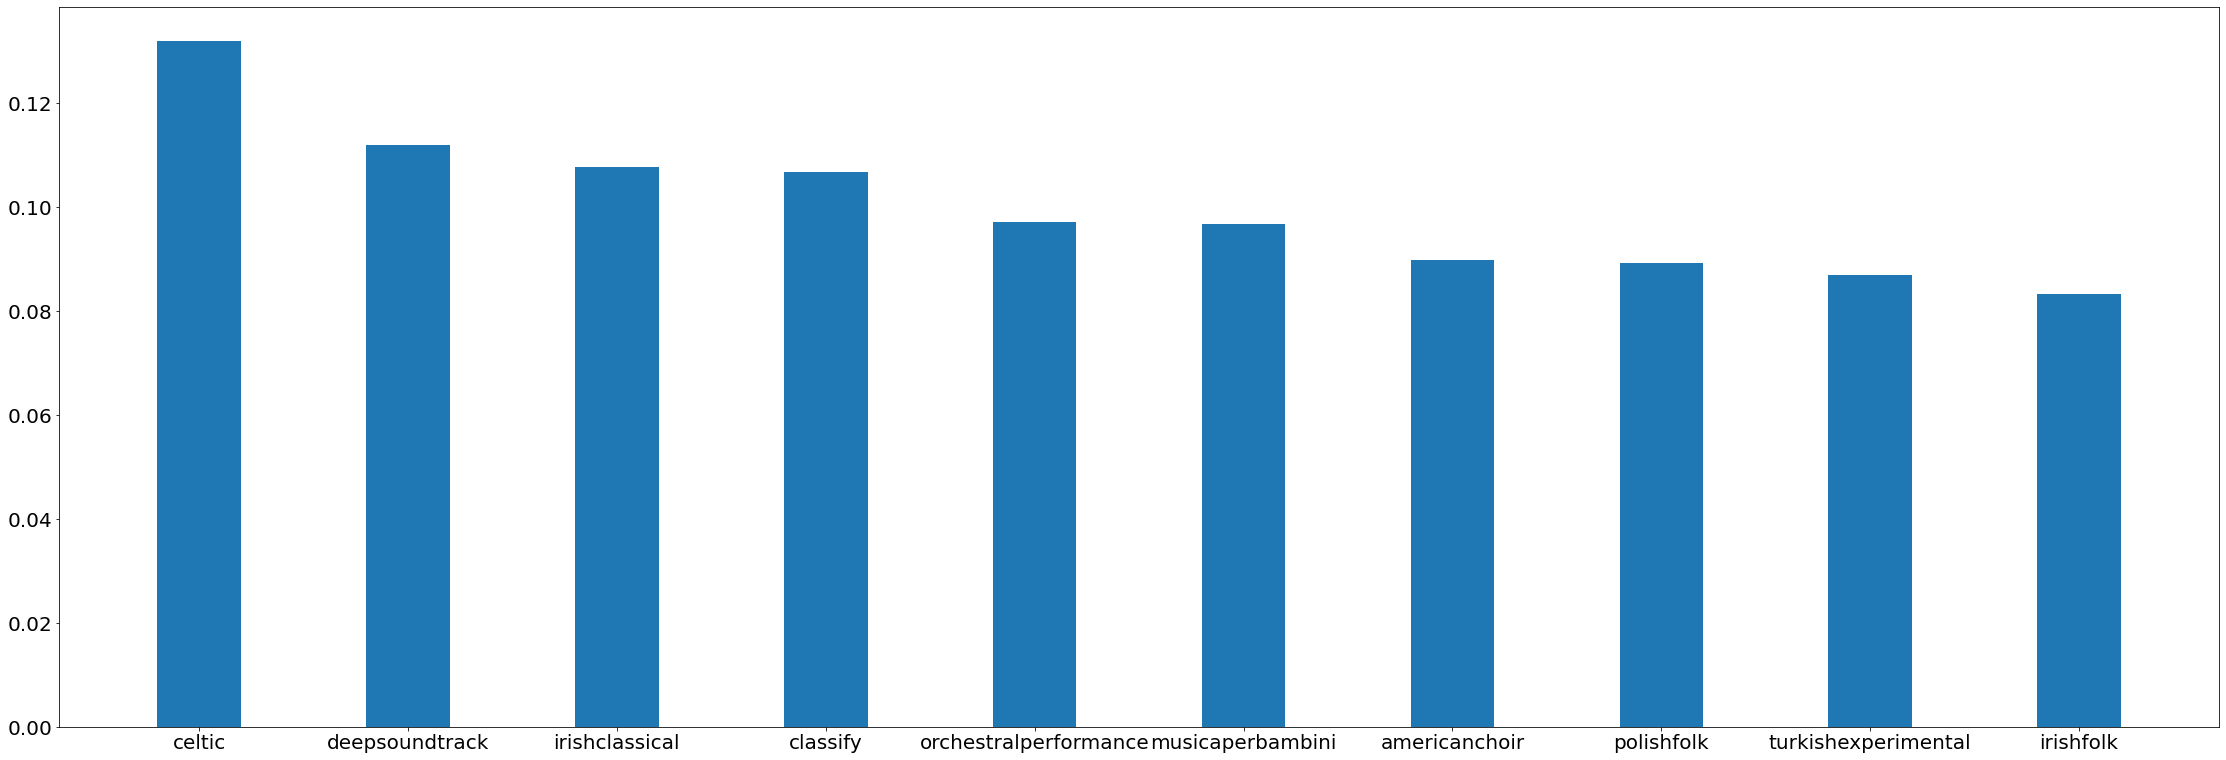

In [ ]:
top10genres = []
top10vals = []
for i in range(1, 11):
  top10genres.append(sortedEnergies[i][0])
  top10vals.append(sortedEnergies[i][1])

fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(top10genres,top10vals, width=0.4)
plt.rcParams['font.size'] = 20
plt.show()

# **Top 10 Least Energy Variance Genres**

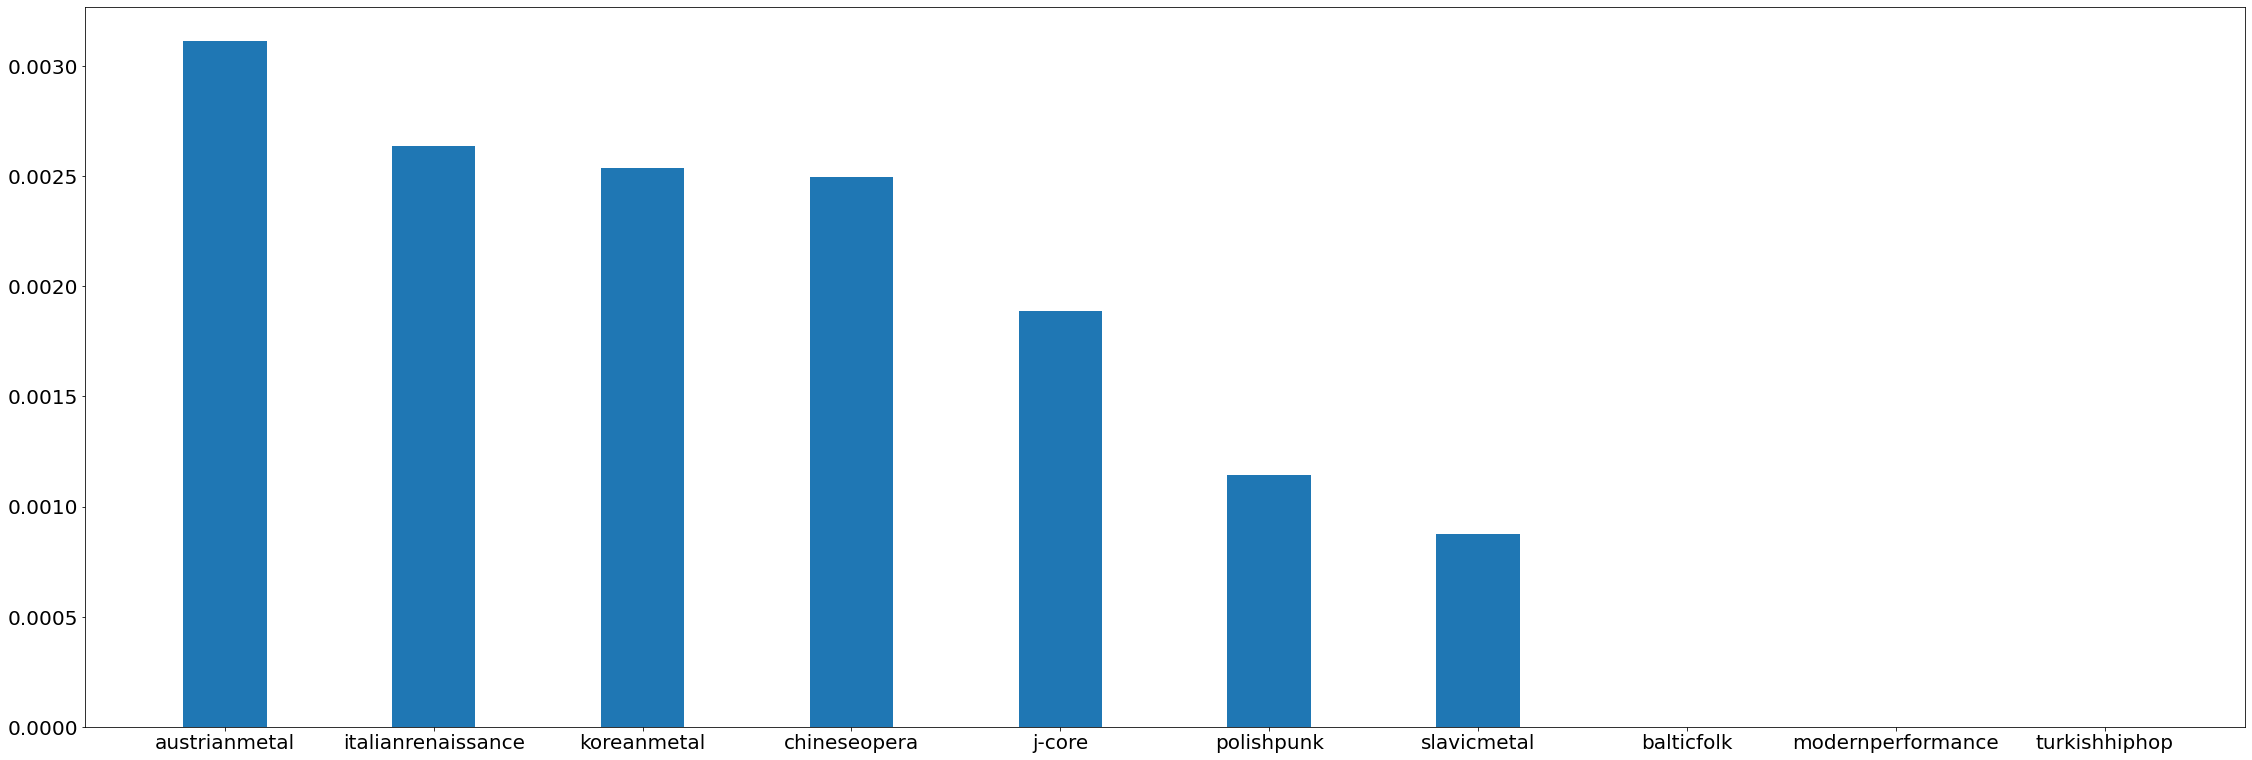

In [ ]:
bot10genres = []
bot10vals = []
length = len(sortedEnergies) - 1
for i in reversed(range(10)):
  bot10genres.append(sortedEnergies[length - i][0])
  bot10vals.append(sortedEnergies[length - i][1])

fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(bot10genres,bot10vals, width=0.4)
plt.rcParams['font.size'] = 20
plt.show()

# **Analyzing the Energy Variance Data**
The energy values in the Spotify API are calculated through a mixture of the track's BPM, loudness, intensity, and activity. The three genres that presented the most variability in energy were Celtic, Deep Soundtrack, and Irish Classical. The three genres that present the least variability in energy were Turkish Hip-Hop, Modern Performance, and Baltic Folk.

We will now take a closer look at some distributions of individual genres that presented a large amount of variability and those with a tiny amount of variability. These genres were chosen as they are able to be easily defined and explained to a common listener. Some of the more obscure genres that Spotify presents don't have a clear definition and were thus left out of this closer analysis.

**Orchestral Performance**

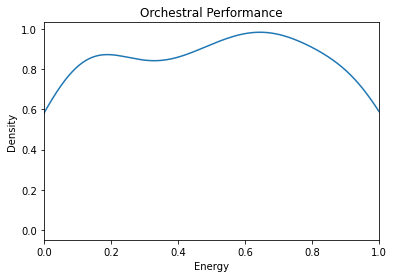

In [ ]:
orchestral = pd.DataFrame(genreEnergies['orchestralperformance'])
orchestral.plot(kind='density', title='Orchestral Performance', legend=False)
plt.xlim([0,1])
plt.xlabel('Energy')
plt.show()

**American Choir**

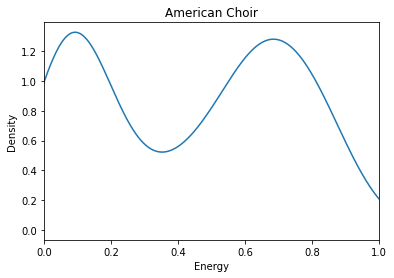

In [ ]:
choir = pd.DataFrame(genreEnergies['americanchoir'])
choir.plot(kind='density',title='American Choir',legend=False)
plt.xlim([0,1])
plt.xlabel('Energy')
plt.show()

**Videogame Music**

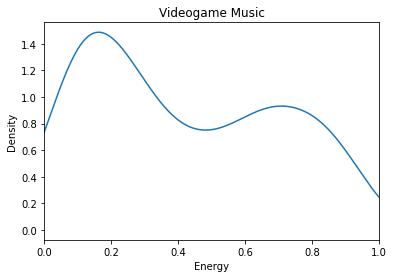

In [ ]:
vgm = pd.DataFrame(genreEnergies['videogamemusic'])
vgm.plot(kind='density',title='Videogame Music',legend=False)
plt.xlim([0,1])
plt.xlabel('Energy')
plt.show()

**Slavic Metal**

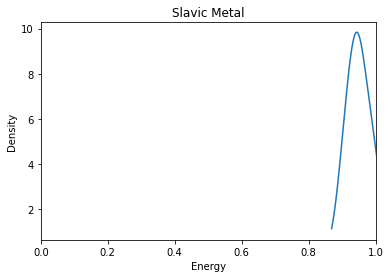

In [ ]:
slavicmetal = pd.DataFrame(genreEnergies['slavicmetal'])
slavicmetal.plot(kind='density',title='Slavic Metal',legend=False)
plt.xlim([0, 1])
plt.xlabel('Energy')
plt.show()

**J-Core**

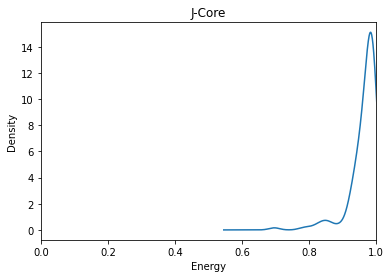

In [ ]:
jcore = pd.DataFrame(genreEnergies['j-core'])
jcore.plot(kind='density',title='J-Core',legend=False)
plt.xlim([0,1])
plt.xlabel('Energy')
plt.show()

**Chinese Opera**

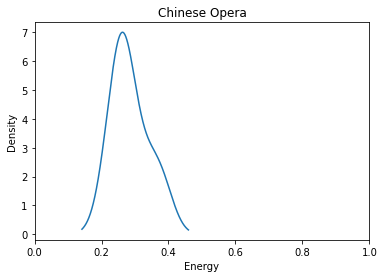

In [ ]:
copera = pd.DataFrame(genreEnergies['chineseopera'])
copera.plot(kind='density',title="Chinese Opera",legend=False)
plt.xlim([0,1])
plt.xlabel('Energy')
plt.show()

"Characterized by soft singing and minimal musical accompaniment — typically only a drum or clapper and a bamboo flute" https://www.historymuseum.ca/cantoneseopera/hist-e.shtml

**Create genreValenceVariances, which will be a dictionary mapping each individual genre to the valence variance of every track within that genre. From this dict, sortedValences will be created.**

In [ ]:
genreValences = defaultdict(list) #dictionary mapping each genre to a list of energy values of all its tracks
genreValenceVariances = dict.fromkeys(uniqGenres) #dictionary mapping each genre to its energy variance()

for index, track in genreTracks.iterrows():
  genreValences[track['Genre']].append(track['Valence'])

for genre, valences in genreValences.items():
  genreValenceVariances[genre] = np.var(valences)

sortedValences = sorted(genreValenceVariances.items(), key=lambda x: x[1], reverse=True)

# **Top 10 Valence Variance Genres**

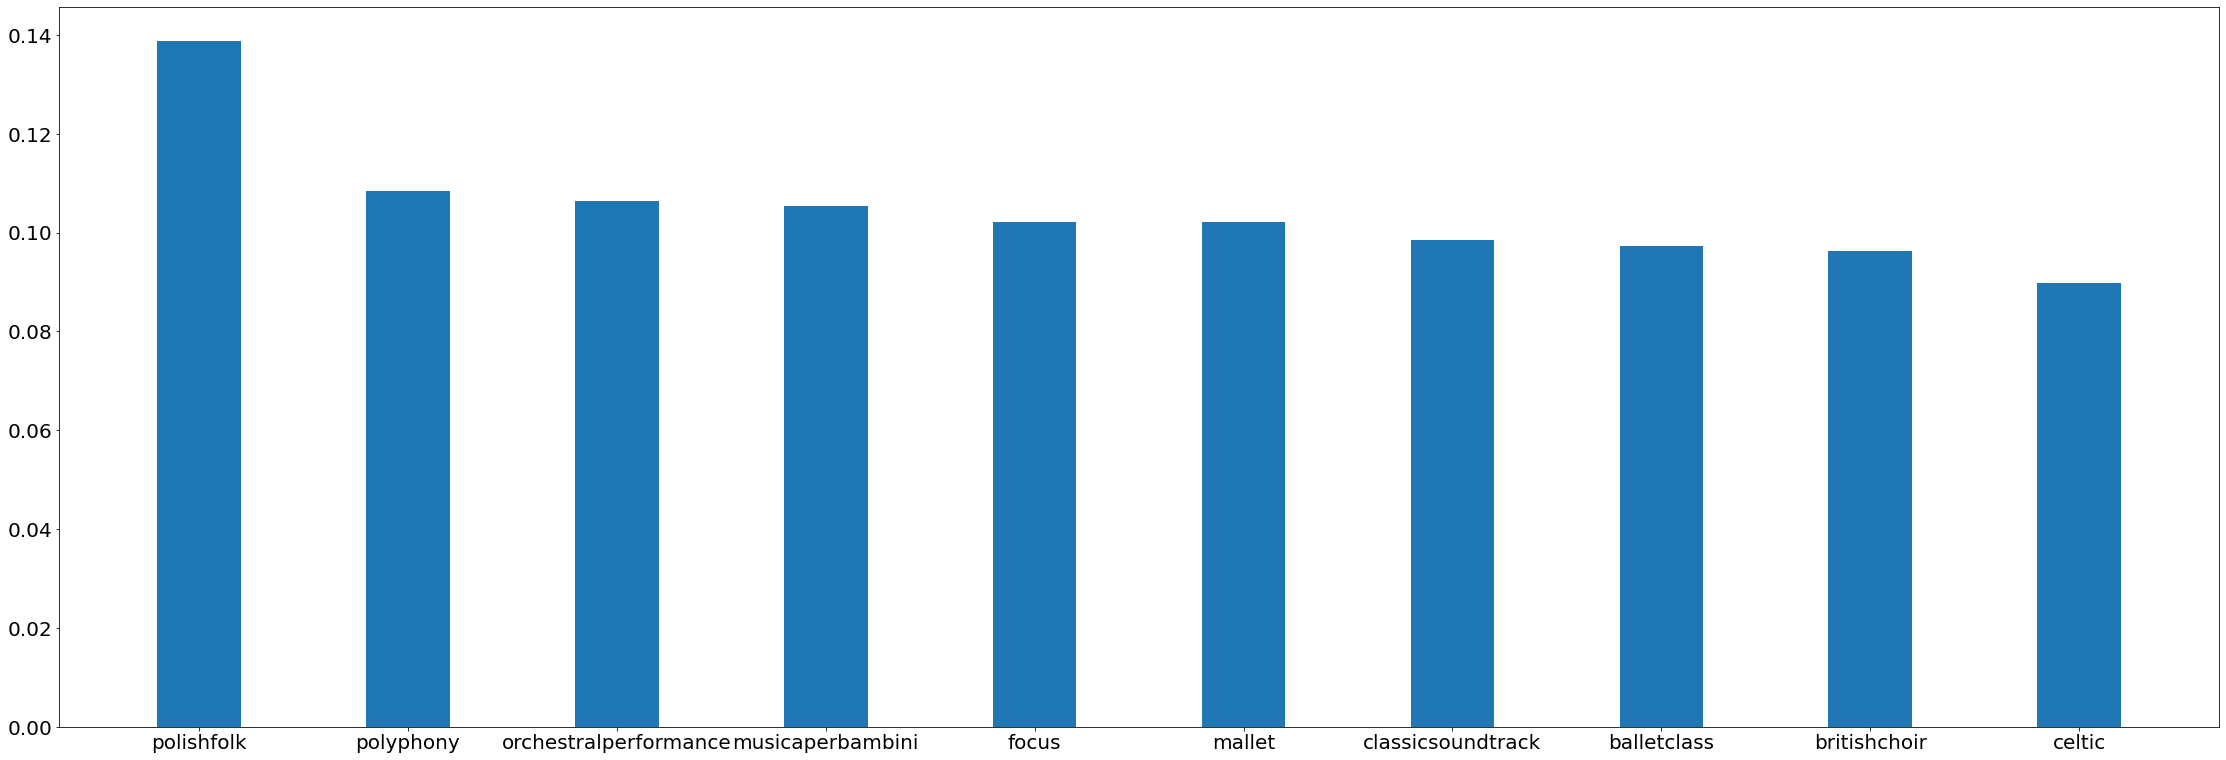

In [ ]:
top10genres = []
top10vals = []
for i in range(1, 11):
  top10genres.append(sortedValences[i][0])
  top10vals.append(sortedValences[i][1])

fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(top10genres,top10vals, width=0.4)
plt.rcParams['font.size'] = 20
plt.show()

# **Top 10 Least Valence Variance Genres**

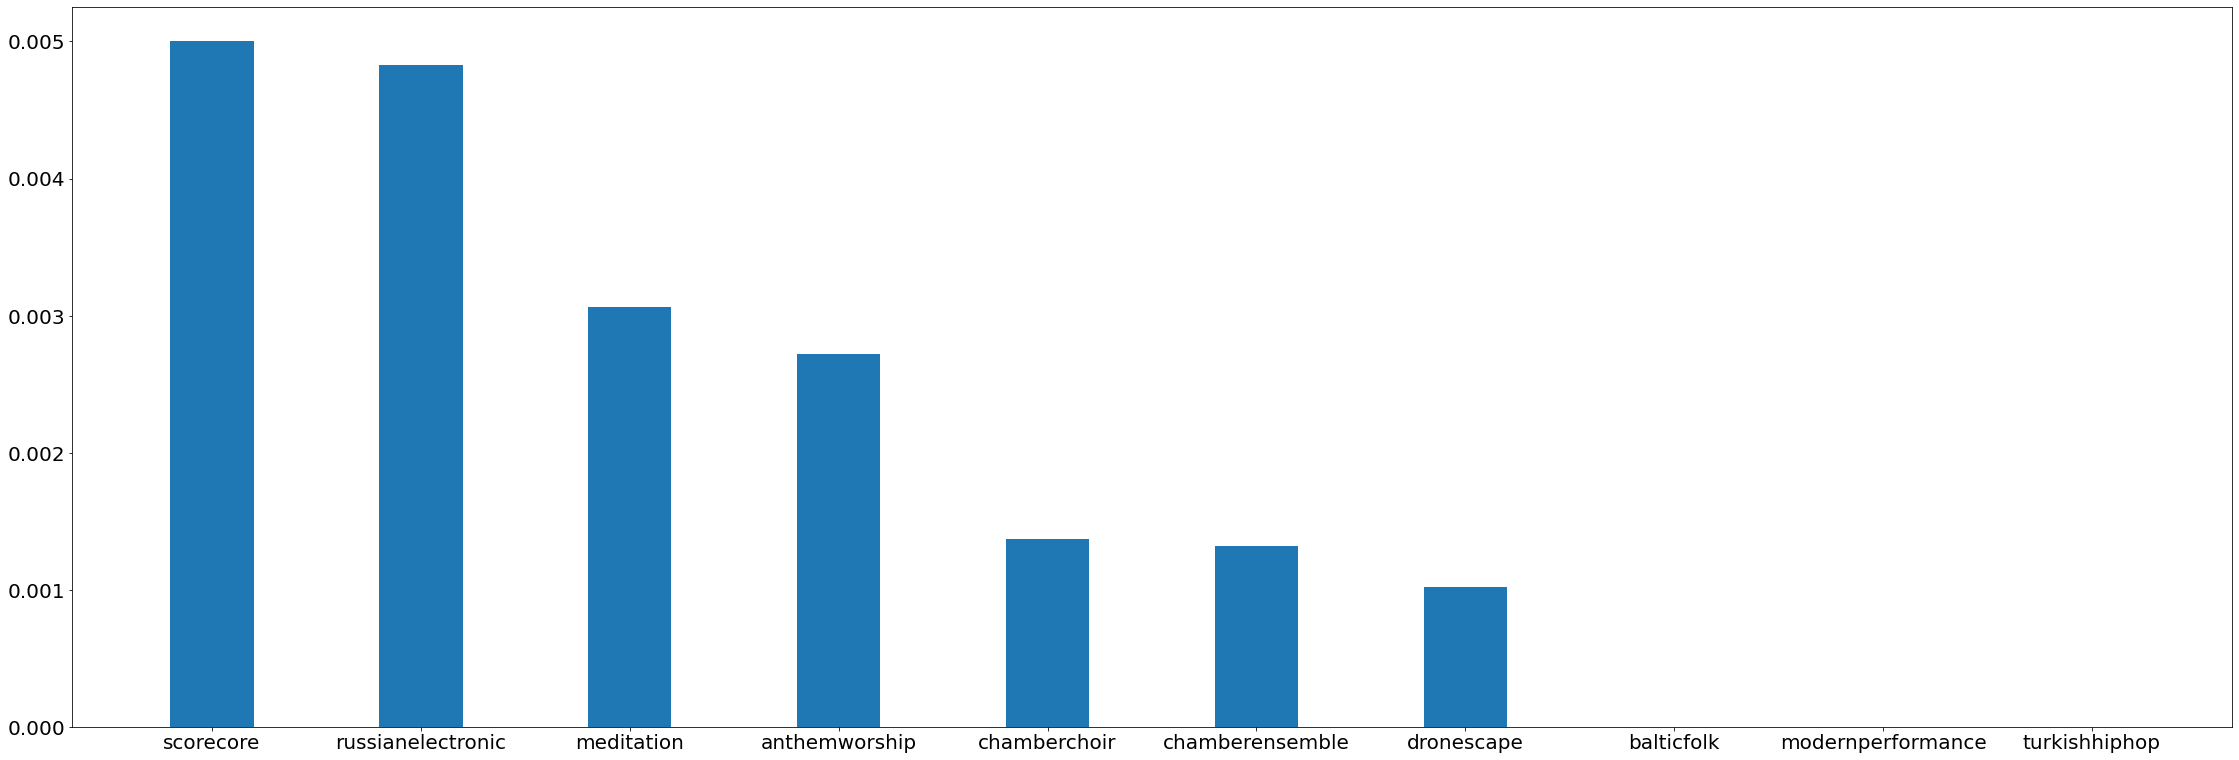

In [ ]:
bot10genres = []
bot10vals = []
length = len(sortedValences) - 1
for i in reversed(range(10)):
  bot10genres.append(sortedValences[length - i][0])
  bot10vals.append(sortedValences[length - i][1])

fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(bot10genres,bot10vals, width=0.4)
plt.rcParams['font.size'] = 10
plt.show()

# **Analyzing the Valence Variability Data**
The valence values are calculated

**Polish Folk**

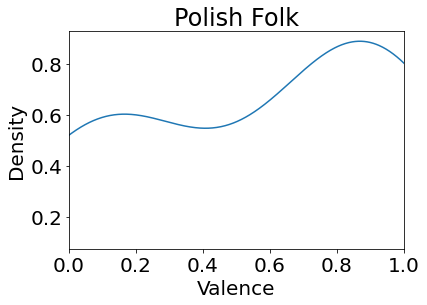

In [ ]:
polfolk = pd.DataFrame(genreValences['polishfolk'])
polfolk.plot(kind='density',title='Polish Folk',legend=False)
plt.xlim([0,1])
plt.xlabel('Valence')
plt.show()

**Orchestral Performance**

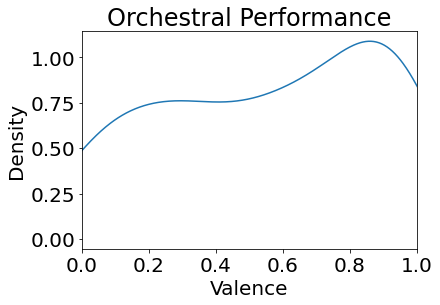

In [ ]:
orchestralVal = pd.DataFrame(genreValences['orchestralperformance'])
orchestralVal.plot(kind='density',title='Orchestral Performance',legend=False)
plt.xlim([0,1])
plt.xlabel('Valence')
plt.show()

**Musica per bambini**

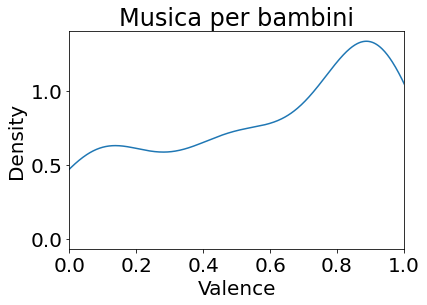

In [ ]:
musicaperbambini = pd.DataFrame(genreValences['musicaperbambini'])
musicaperbambini.plot(kind='density',title='Musica per bambini',legend=False)
plt.xlim([0,1])
plt.xlabel('Valence')
plt.show()

**Scorecore (film score)**

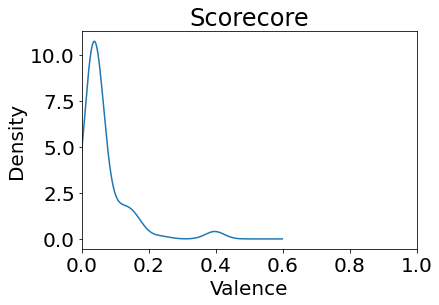

In [ ]:
scorecore = pd.DataFrame(genreValences['scorecore'])
scorecore.plot(kind='density',title='Scorecore',legend=False)
plt.xlim([0,1])
plt.xlabel('Valence')
plt.show()

**Russian Electronic**

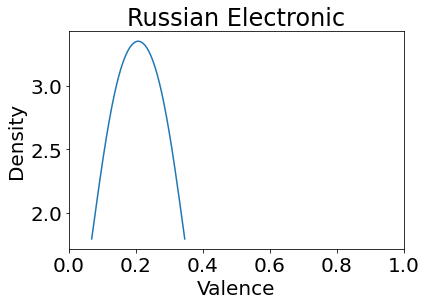

In [ ]:
ruselectro = pd.DataFrame(genreValences['russianelectronic'])
ruselectro.plot(kind='density',title='Russian Electronic',legend=False)
plt.xlim([0,1])
plt.xlabel('Valence')
plt.show()

**Meditation**

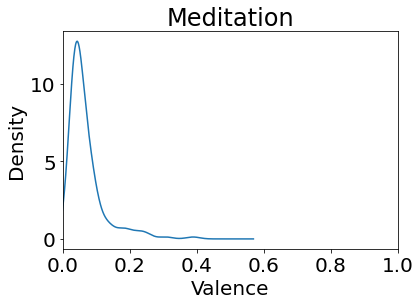

In [ ]:
meditation = pd.DataFrame(genreValences['meditation'])
meditation.plot(kind='density',title='Meditation',legend=False)
plt.xlim([0,1])
plt.xlabel('Valence')
plt.show()

# **Acousticness**

In [ ]:
genreAcousticness = defaultdict(list) #dictionary mapping each genre to a list of energy values of all its tracks
genreAcousticVariances = dict.fromkeys(uniqGenres) #dictionary mapping each genre to its energy variance()

for index, track in genreTracks.iterrows():
  genreAcousticness[track['Genre']].append(track['Acousticness'])

for genre, acousticness in genreAcousticness.items():
  genreAcousticVariances[genre] = np.var(acousticness)

sortedAcousticness = sorted(genreAcousticVariances.items(), key=lambda x: x[1], reverse=True)

# **Top 10 Acousticness Variance Genres**

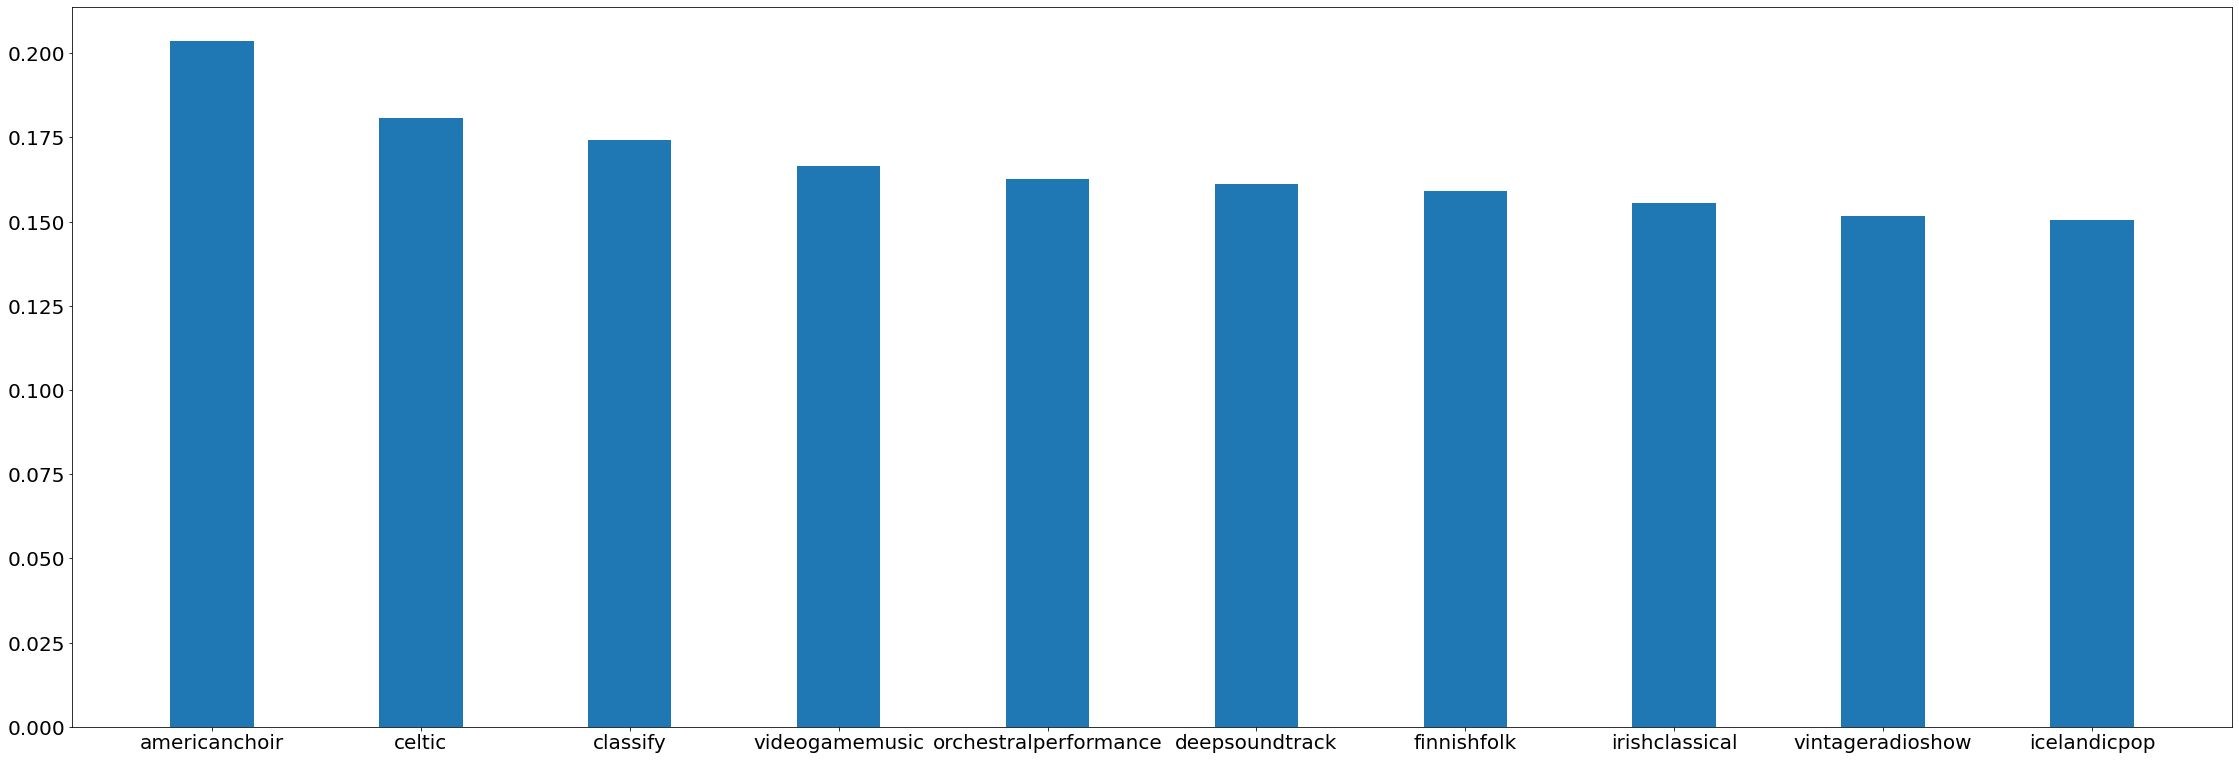

In [ ]:
top10genres = []
top10vals = []
for i in range(1, 11):
  top10genres.append(sortedAcousticness[i][0])
  top10vals.append(sortedAcousticness[i][1])

fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(top10genres,top10vals, width=0.4)
plt.rcParams['font.size'] = 20
plt.show()

# **Top 10 Least Acousticness Variance Genres**

turkishhiphop
['chamberchoir', 'symphonicpowermetal', 'swedishdeathmetal', 'turkishmetal', 'crustpunk', 'peruvianmetal', 'polishblackmetal', 'balticfolk', 'modernperformance', 'turkishhiphop']
[7.031172839506196e-05, 5.010026582073584e-05, 4.009809116740567e-05, 2.6225591059053257e-05, 1.3757947559048111e-05, 4.723190484778286e-06, 1.005694968e-08, 0.0, 0.0, 0.0]


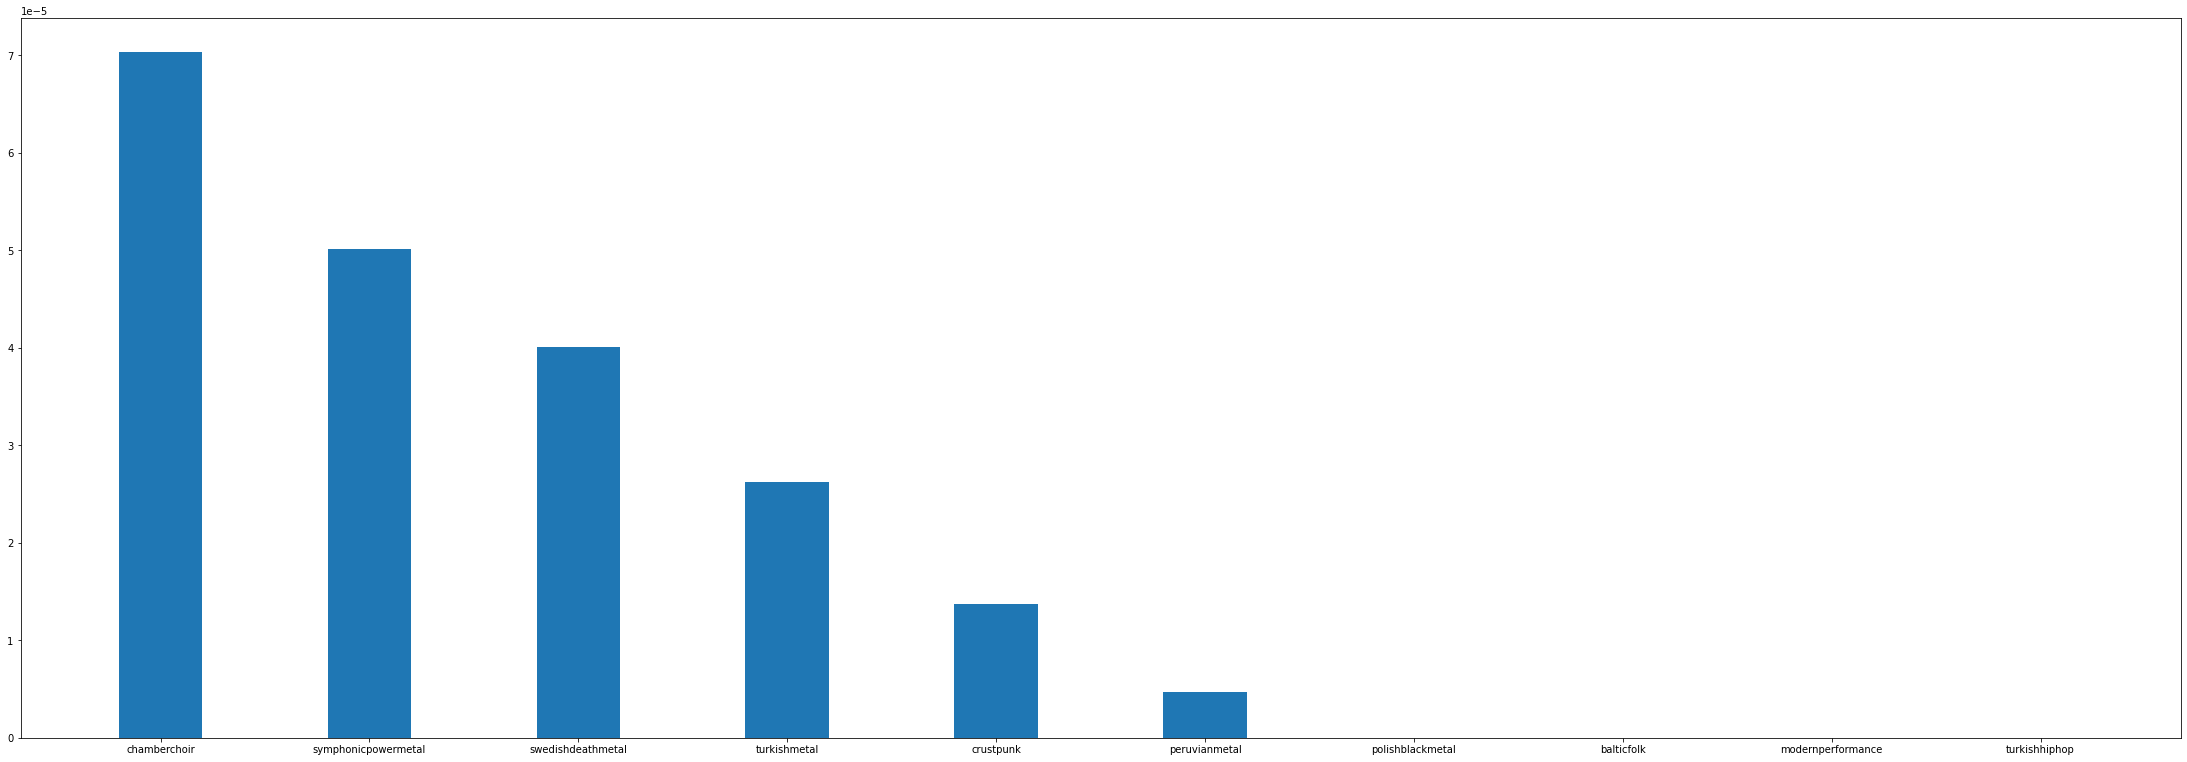

In [ ]:

bot10genres = []
bot10vals = []
length = len(sortedAcousticness) - 1
print(sortedAcousticness[length - i][0])
for i in reversed(range(11)):
  if type(sortedAcousticness[length - i][0]) is str:
    bot10genres.append(sortedAcousticness[length - i][0])
    bot10vals.append(sortedAcousticness[length - i][1])

print(bot10genres)
print(bot10vals)
fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(bot10genres,bot10vals, width=0.4)
plt.rcParams['font.size'] = 10
plt.show()

## **Analyzing Variance of Popular Music**

Filter the rows of charts.csv so that only the charts at the end of each year show up

In [ ]:
yearlyCharts = charts[charts['date'].str.contains("-12-(2[56789]|3[01])", regex=True)]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Find the tracks in yearlyCharts in Spotify using spotipy

In [ ]:
#sp = spotify
#print(len(yearlyCharts))
#print(yearlyCharts.iloc[0])
#result = sp.search(q="artist:Taylor Swift track:Willow", type="track", market="US", limit=1)
#print(result['tracks']['items'][0]['uri'])

yearlyURIs = defaultdict(list) #maps year to list of track URIs of the top 100 for that year
#count = 0
for index, song in yearlyCharts.iterrows():
  yr = song['date'][0:4]
  artist = song['artist']
  track = song['song']
  result = sp.search(q="artist:" + artist + " track:" + track, type="track", limit=1)
  if result['tracks']['items']:
    uri = result['tracks']['items'][0]['uri']
    yearlyURIs[yr].append(uri)
  #count += 1
  #print(count)
#print(yearlyURIs)


In [40]:
yearlyEnergies = defaultdict(list)
yearlyValences = defaultdict(list)
#print(sp.audio_features(['spotify:track:77p4fRpoeiZMtUy3P9kN21', 'spotify:track:0bYg9bo50gSsH3LtXe2SQn']))

#count = 0
for year, topTracks in yearlyURIs.items():
  for uri in topTracks:
    audioFeatures = sp.audio_features(uri)
    yearlyEnergies[year].append(audioFeatures[0]['energy'])
    yearlyValences[year].append(audioFeatures[0]['valence'])
    #count += 1
    #print(count)


In [ ]:
yearlyEnergyVars = dict.fromkeys(yearlyURIs)
yearlyValenceVars = dict.fromkeys(yearlyURIs)
for year, energies in yearlyEnergies.items():
  yearlyEnergyVars[year] = np.var(energies)
for year, valences in yearlyValences.items():
  yearlyValenceVars[year] = np.var(valences)

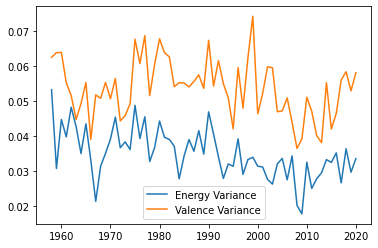

In [ ]:
yearlyVars = pd.DataFrame({
    'Energy Variance': yearlyEnergyVars.values(),
    'Valence Variance': yearlyValenceVars.values()
  }, index=yearlyURIs.keys())
lines = yearlyVars.plot.line()
plt.gca().invert_xaxis()